<a href="https://colab.research.google.com/github/EllaThomasson/labs-ds3001/blob/main/HedonicLab_EllaThomasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hedonic Pricing Lab

In [2]:
! git clone https://github.com/EllaThomasson/labs-ds3001

fatal: destination path 'labs-ds3001' already exists and is not an empty directory.


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('/content/labs-ds3001/pierce_county_house_sales.csv', low_memory=False)

Question 1

In [10]:
df.head(10)
df.shape[0]

16814

In [6]:
df.isnull().sum()

,0
sale_date,0
sale_price,0
house_square_feet,0
attic_finished_square_feet,0
basement_square_feet,0
attached_garage_square_feet,0
detached_garage_square_feet,0
fireplaces,0
hvac_description,7
exterior,1


Since there are so few known values for waterfront_type and view_quality, I will just remove these columns from the dataset (because it doesnt make sense to remove all of the rows and since there is so little to go off of, I feel like we shouldn't just do a mean calculation to replace the missing values).

Then, I will remove all of the missing rows from there (since there are not many missing values other than for waterfront_type and view_quality).

In [11]:
df = df.drop(columns=['waterfront_type', 'view_quality'])

In [12]:
df_cleaned = df.dropna()

In [18]:
df_cleaned.head(5)

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,SEWER/SEPTIC INSTALLED


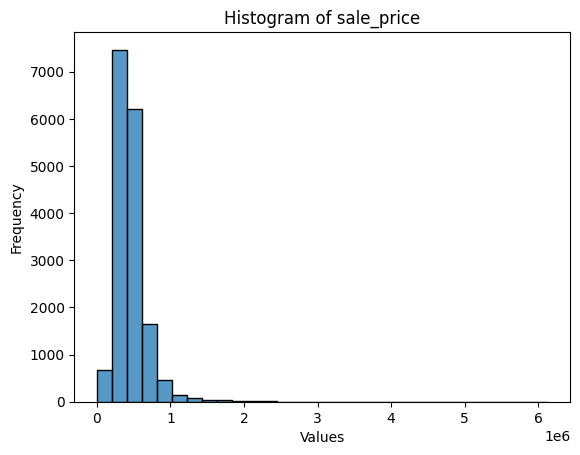

In [17]:
sns.histplot(df_cleaned['sale_price'], bins=30, kde=False)
plt.title('Histogram of sale_price')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

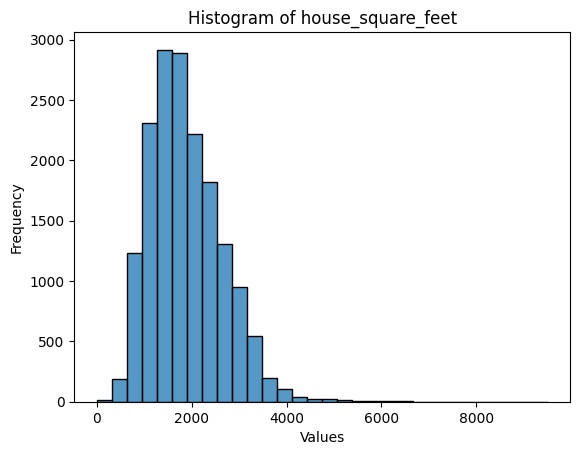

In [19]:
sns.histplot(df_cleaned['house_square_feet'], bins=30, kde=False)
plt.title('Histogram of house_square_feet')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

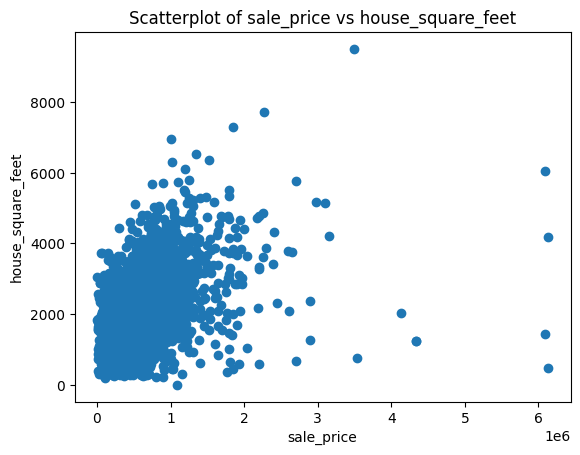

In [32]:
plt.scatter(df['sale_price'], df['house_square_feet'])
plt.title('Scatterplot of sale_price vs house_square_feet')
plt.xlabel('sale_price')
plt.ylabel('house_square_feet')
plt.show()

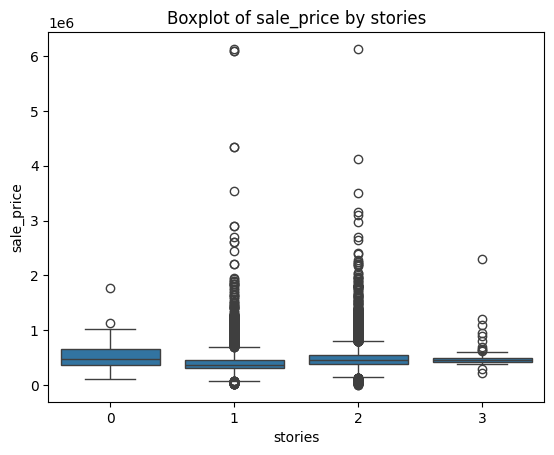

In [27]:
sns.boxplot(data=df, x='stories', y='sale_price')
plt.title('Boxplot of sale_price by stories')
plt.xlabel('stories')
plt.ylabel('sale_price')
plt.show()

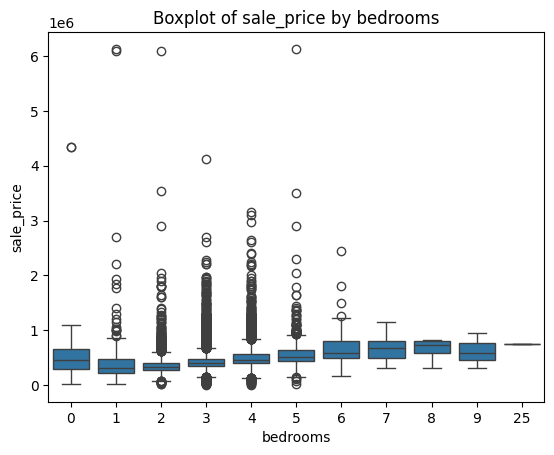

In [31]:
sns.boxplot(data=df, x='bedrooms', y='sale_price')
plt.title('Boxplot of sale_price by bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('sale_price')
plt.show()

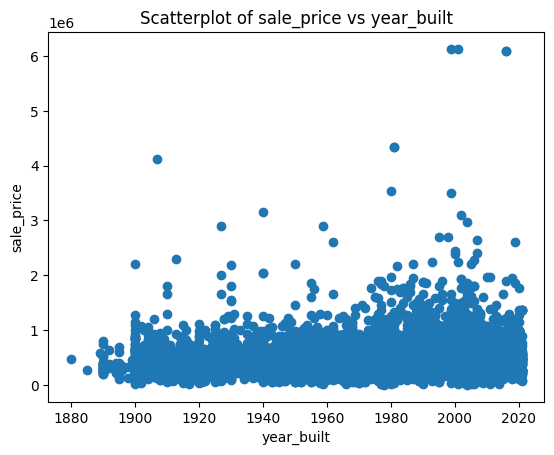

In [29]:
plt.scatter(df['year_built'], df['sale_price'])
plt.title('Scatterplot of sale_price vs year_built')
plt.xlabel('year_built')
plt.ylabel('sale_price')
plt.show()

Question 2

In [ ]:
# using one-hot-encoding

In [39]:
df_cleaned.head(5)

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,SEWER/SEPTIC INSTALLED


In [46]:
# using one hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['hvac_description', 'exterior', 'interior', 'roof_cover', 'utility_sewer', 'sale_date'], drop_first=True)

In [50]:
df_encoded.head(5)

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,...,sale_date_2020-12-21,sale_date_2020-12-22,sale_date_2020-12-23,sale_date_2020-12-24,sale_date_2020-12-26,sale_date_2020-12-27,sale_date_2020-12-28,sale_date_2020-12-29,sale_date_2020-12-30,sale_date_2020-12-31
0,380000,2157,0,0,528,0,0,2,1993,3,...,False,False,False,False,False,False,False,False,False,False
1,383000,2238,0,0,396,0,0,2,2017,4,...,False,False,False,False,False,False,False,False,False,False
2,419900,1452,0,0,0,0,1,1,1965,3,...,False,False,False,False,False,False,False,False,False,False
3,251660,832,0,0,0,0,0,1,1919,2,...,False,False,False,False,False,False,False,False,False,False
4,500000,1780,0,384,484,0,1,1,1955,3,...,False,False,False,False,False,False,False,False,False,False


Question 3

In [54]:
df_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

Question 4

In [55]:
X_train = df_train.drop('sale_price', axis=1)
y_train = df_train['sale_price']

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
X_test = df_test.drop('sale_price', axis=1)
y_test = df_test['sale_price']

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

39635352016.62187
0.39950288255046695


Question 5

Question 6